<b>1.) Conceptual Question</b>

a.) The appropriate method for this problem is regression.  This problem is an inference problem as we are looking to infer which variables impact the CEO's salary.  This choice was made because this is not a prediction problem; we are merely interested in regressing the CEO's salary onto the included variables and seeing if there is any relationship present between any/all predictors and the response.  Regression was chosen because the outcome is a quantitative value and we can use the estimated coefficients and their associated p values to determine if any relationship exists and if it is statistically significant.  The n in this case are the 350 manufacturing companies in Europe.  The p (predictors) are industry, number of employees, and total profit.  

b.) The appropriate method for this problem is classification.  For this problem, we are most interested in prediction.  This choice was made because our goal is to use the avaialble data to predict whether or not the product will be a success or failure; we are trying to predict an outcome.  Classification was chosen because the outcome is a binary variable and classification is well suited for binary outcomes.  The n in this case are the 31 similar products. The p (predictors) are price of the product, competition price, marketing budget, and ten other variables.  

c.) The appropriate method for this problem is regression.  For this problem, we are most interested in prediction.  This choice was made because we are trying to predict the % change in the dollar in relation to the changes every week in the world stock markets.  Regression was chosen because the response we are trying to predict is a quantitative value which regression is well suited for.  The n in this case are the 52 weeks of world stock market data in 2012.  The p (predictors) are the % change in the market in the United States, the % change in the market in China, and the % change in the market in France.  

<b>2.) Applied Question</b>

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

/Users/josephdziados/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/josephdziados/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
car_mileage = pd.read_csv('Cars_mileage.csv')

In [3]:
car_mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
car_mileage.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
car_mileage['horsepower'].replace('?', np.NAN, inplace=True)
car_mileage.dropna(inplace=True)
car_mileage['horsepower'] = car_mileage['horsepower'].astype(float)

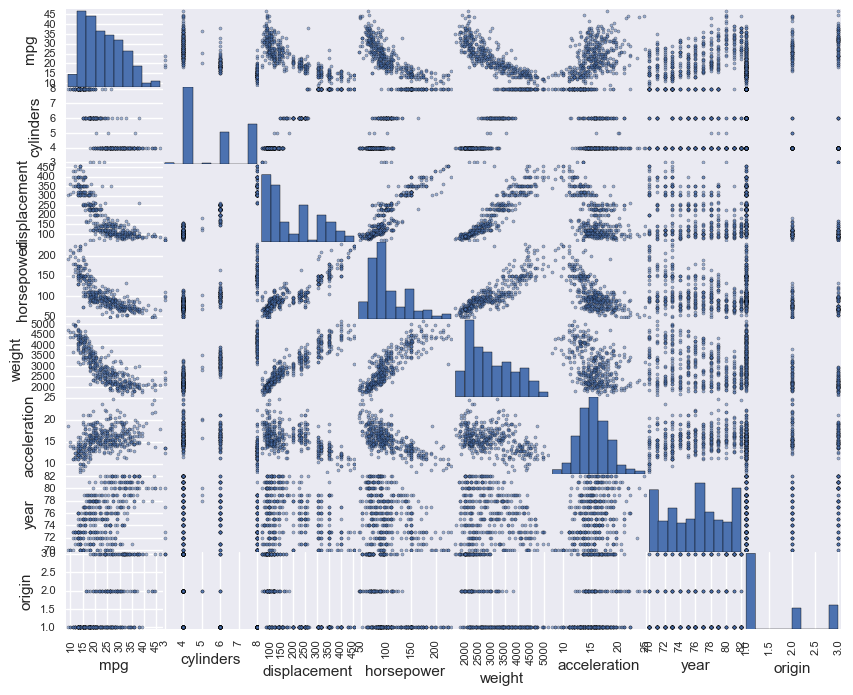

In [6]:
pd.scatter_matrix(car_mileage, figsize=(10,8));

<b>a.) Create a binary variable that represents whether the car's mpg is above or below the dataset's median. Above the median should be represented as 1. Name this variable mpg_binary.</b>

In [7]:
median_mpg = np.median(car_mileage['mpg'])
car_mileage['mpg_binary'] = (car_mileage['mpg'] > median_mpg).astype(int)
print car_mileage['mpg_binary'].value_counts()

1    196
0    196
Name: mpg_binary, dtype: int64


In [8]:
car_mileage.drop(['mpg', 'cylinders', 'origin','name'],axis=1, inplace=True)

/Users/josephdziados/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


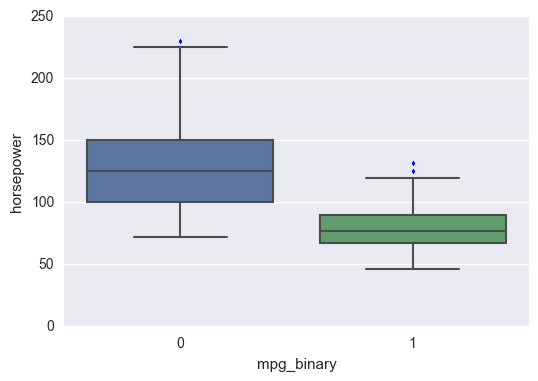

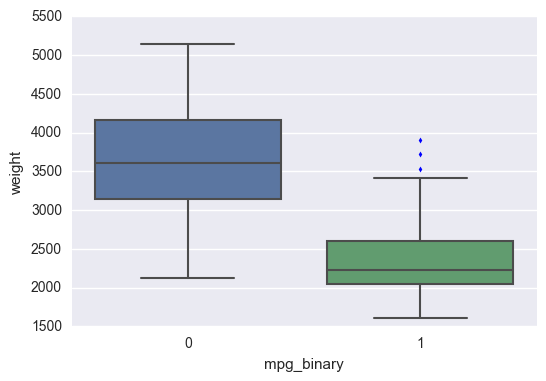

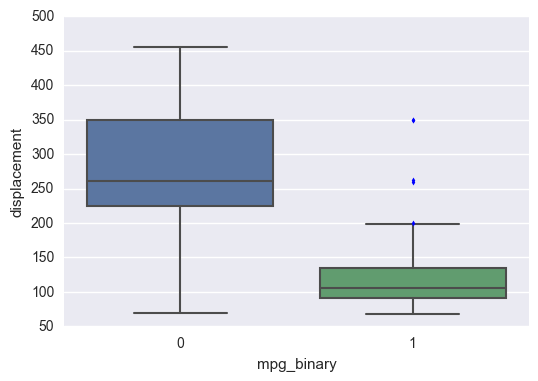

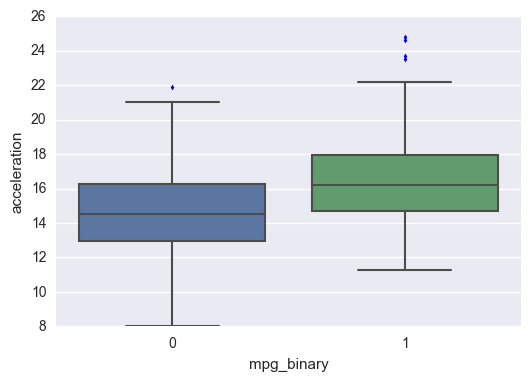

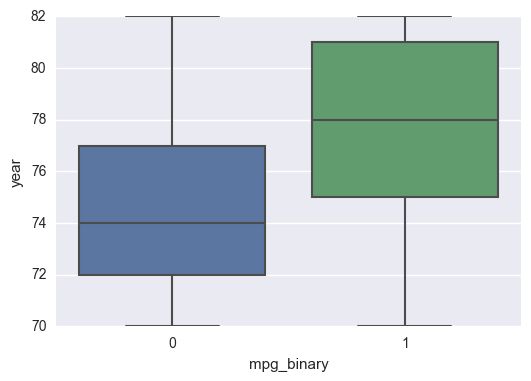

In [9]:
chart1, ax1 = plt.subplots()
sns.boxplot(car_mileage['horsepower'], car_mileage['mpg_binary'], data=car_mileage,ax=ax1);
chart2, ax2 = plt.subplots()
sns.boxplot(car_mileage['weight'], car_mileage['mpg_binary'], ax=ax2)
chart3, ax3 = plt.subplots()
sns.boxplot(car_mileage['displacement'], car_mileage['mpg_binary'],ax=ax3)
chart4, ax4 = plt.subplots()
sns.boxplot(car_mileage['acceleration'], car_mileage['mpg_binary'],ax=ax4)
chart5, ax5 = plt.subplots()
sns.boxplot(car_mileage['year'], car_mileage['mpg_binary'],ax=ax5)

<b>b.) Which of the other variables seem most likely to be useful in predicting whether a car's mpg is above or below its median? Describe your findings and submit visual representations of the relationship between mpg_binary and other variables.</b>

It appears that horsepower, weight, displacement, acceleration, and year are all most likely to be useful in predicting whether a car's mpg is above or below its median.  We can see from the above boxplots that there appear to be some relationships between each of the variables and the outcome.  Looking above at the scatterplot of all variables we can see relationships as well between the variables like horsepower and weight with car mpg before that variable is split at the median.  We can also see that the majority of the predictors are not normally distributed.

In [10]:
columns = ['horsepower', 'weight', 'displacement', 'acceleration', 'year']
X = car_mileage.as_matrix(columns)
y = car_mileage.as_matrix(['mpg_binary'])

<b>(c) Split the data into a training set and a test set.</b>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train = y_train.ravel()
y_test = y_test.ravel()

<b>(d) Perform two of the following in order to predict mpg_binary:  Logistic Regression and Random Forest chosen</b>

Logistic Regression

In [12]:
logistic_model = LogisticRegression()

In [13]:
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
probs = logistic_model.predict_proba(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [14]:
print 'Logistic Regression Accuracy: {0}'.format(accuracy)
print 'Logistic Regression Test Error: {0}'.format(1-accuracy)

Logistic Regression Accuracy: 0.918367346939
Logistic Regression Test Error: 0.0816326530612


In [15]:
for predictor, coef in zip(columns, list(logistic_model.coef_.ravel())):
    print predictor,coef

horsepower -0.0499675431697
weight -0.00336404455959
displacement -0.00732019345214
acceleration -0.0380190570702
year 0.21362340921


In [16]:
confusion_matrix(y_test, y_pred)

array([[40,  8],
       [ 0, 50]])

<b>Observations</b>

The test error rate for this model is 0.0816.  There are other observations to note.  First, more analysis would have to be done to see if the relationship between these variables and the mpg_binary variable is indeed linear.  By looking at the scatterplot, we can see that horsepower, weight, and displacement all appear to be non-linear with mpg.  If the relationship is non-linear, logistic regression may not be a good model to use as it may result in high bias.  Although the error rate is low for this model, a k-fold cross validation would likely need to be run to confirm the model's accuracy.  We can see from the log odds coefficients that as horsepower, weight, and acceleration decrease, the car's mpg are likely to be higher than the median.  The accuracy score may not neccessarily tell the whole story with regards to this model or any logistic classification problem which is why I also checked the confusion matrix.  We can see that there were not many false negatives/positives which adds to the goodness of fit for this model.  Things to consider moving forward are whether or not there is correlation between any of our variables, and whether or not we should remove some predictors; weight and displacement for instance seem to be correlated in the scatter matrix above, so it may be overkill to have both in the model.  Also, we may be interested in transforming some variables to capture any non-linear effects.  

Random Forest

In [19]:
rf_model = RandomForestClassifier(n_estimators=300,oob_score=True)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [20]:
print 'Random Forest Accuracy: {0}'.format(accuracy)
print 'Random Forest Test Error: {0}'.format(1-accuracy)

Random Forest Accuracy: 0.908163265306
Random Forest Test Error: 0.0918367346939


In [21]:
for predictor, importance in zip(columns, rf_model.feature_importances_):
    print predictor, importance

horsepower 0.166720945815
weight 0.320266506732
displacement 0.374670666841
acceleration 0.0610982435752
year 0.0772436370367


In [22]:
print 'Out of bag error estimation: {0}'.format(1-rf_model.oob_score_)

Out of bag error estimation: 0.0544217687075


<b>Observations</b>

The test error rate for the Random Forest model is .0918.  We can alternately use the out of bag error estimation on the training set which is 0.0544.  We can see that using a more flexible method like a Random Forest yields a lower test error rate if we were to use the out of bag error estimation.  This may be due to the potential non-linearity of the problem, for the fact that no variable transformations neccessarily need to be done, and the fact that bagging and using only a random subset of predictors at each split in the trees helps reduce correlation between the predictors and variance in the model.  We can also view the importance of the features to help with feature selection.  It appears that horsepower, weight, and displacement are all important features in this model.  We can also test different amounts of trees to see if adding more trees will reduce the test error rate.

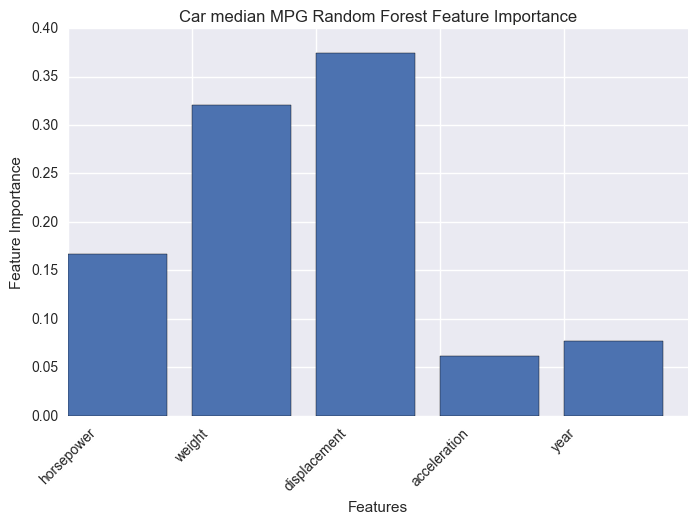

In [23]:
plt.figure(figsize=(8,5))
x = list(range(len(rf_model.feature_importances_)))
plt.bar(x, rf_model.feature_importances_)
plt.title('Car median MPG Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.xticks(x, columns, rotation=45);